# Projeto 3 - Modsim

# MODELAGEM SALTO DE PARAQUEDAS FELIX BAUMGARTNER


   # Implementando os Dados:

In [274]:
from math import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [275]:
#Dados em S.I

h_0 = 38970 # altitude inicial
m = 158 # massa do paraquedista + equipamento
Cd = 0.82 # coeficiente de arrasto
At = pi * (0.3725 ** 2) # área da seção transversal do paraquedista
Atp = pi * (4.5 ** 2) # área da seção transversal do paraquedas
G = 6.67 * 1e-11 # Constante Gravitacional Universal
Rt = 6371 * 1e3 # Raio da Terra
Mt = 5.9742 * 1e24 # Massa da Terra



# Dados Iniciais

x0 = 0
y0 = h_0
vx_0 = 1
vy_0 = 0

inicial = [x0, y0, vx_0, vy_0]

# Lista Tempo
dt = 1
lista_t = np.arange(0, 280, dt)

# Implementando a função:

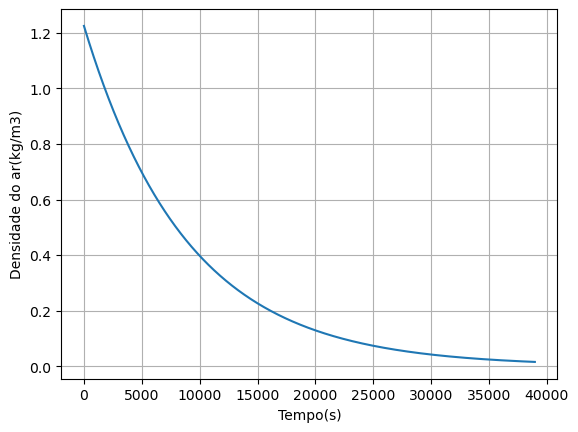

In [276]:
def densidade(y):
    densar=1.225 * ( e ** (-y/1000 / 8.882))
    if densar < 0:
        densar = 0
    return densar

lista_y = np.arange(0,h_0,1)
lista_dens = [densidade(y) for y in lista_y]
plt.plot(lista_y,lista_dens)
plt.grid()
plt.xlabel('Tempo(s)')
plt.ylabel('Densidade do ar(kg/m3)')
plt.show()

In [277]:
def modelo(X, t, vventox, vventoy):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]

        
    v = ((vx ** 2) + (vy ** 2)) ** 0.5
    rho = densidade(y)
    
    vrel = sqrt((vventox-vx)**2+(vventoy-vy)**2)
    
    

    if t > 260:
        Fd = (1/2) * rho * 2*Atp * Cd * (vrel ** 2)
        vventoy = 0
    else:
        Fd = (1/2) * rho * At * Cd * (vrel ** 2)

    cosT = (vventox-vx)/vrel
    senT = (vventoy-vy)/vrel
    
    P = (G * Mt * m ) * ((1/(Rt + y)) ** 2)
    
       
    
        
    dxdt = vx
    dydt = vy
    dvxdt = (Fd * cosT) / m
    dvydt = ((Fd * senT) - P ) / m
    
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    
    return dXdt
    
    

# Implementando Odeint

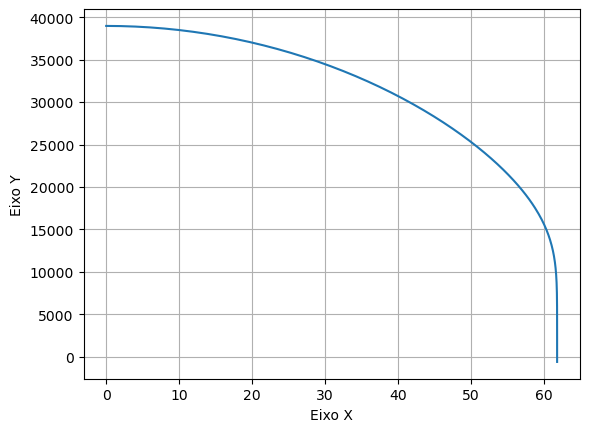

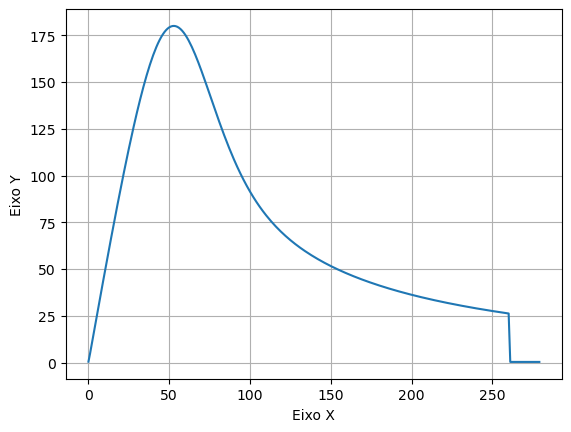

In [278]:
f = odeint(modelo, inicial, lista_t, args=(0,30))

lista_x = f[:,0]
lista_y = f[:,1]

plt.plot(lista_x, lista_y)
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.grid()
plt.show()

vx = f[:,2]
vy = f[:,3]

lista_v = np.sqrt(vx**2+vy**2)
plt.plot(lista_t, lista_v/2)
plt.ylabel('Eixo Y')
plt.xlabel('Eixo X')
plt.grid()
plt.show()

# Validação

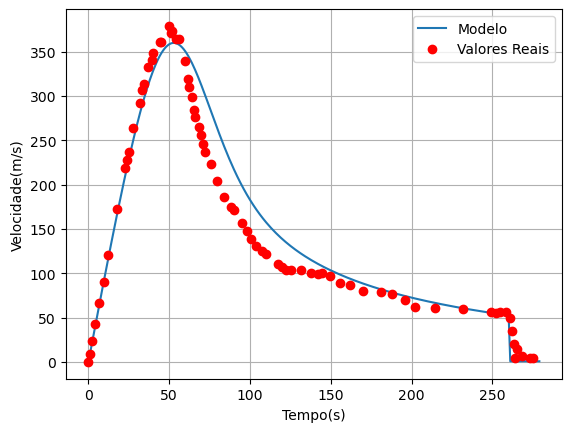

In [279]:
# Dados reais do salto 

lista_dado = [0, -0.000716092096979537,
0.8517350157728707, 8.850182226594143,
2.271293375394322, 23.147677034926517,
4.2586750788643535, 42.891768332899915,
6.813880126182962, 66.72044895205573,
9.369085173501574, 90.54912957121161,
12.208201892744476, 120.50612635633496,
17.602523659305994, 172.24879300792603,
22.429022082018925, 219.22586675410525,
23.84858044164038, 227.39432930437306,
24.98422712933754, 236.9255151151966,
27.823343848580443, 263.477493979173,
31.7981072555205, 292.750622811679,
32.93375394321767, 306.36783012787896,
34.353312302839115, 313.17428550968793,
36.90851735015773, 332.91694462346743,
39.179810725552045, 340.4022553132149,
40.03154574132492, 348.57215004767664,
44.00630914826499, 361.5011928586773,
44.85804416403785, 360.81804099815696,
49.96845425867508, 379.19224811460487,
51.10410094637224, 371.01734073546424,
51.955835962145116, 373.0582032118615,
53.94321766561514, 364.88114755642994,
56.21451104100946, 364.87541881965404,
59.621451104100956, 339.6696930980028,
61.32492113564669, 319.2352890185392,
63.8801261829653, 299.4797402470141,
62.46056782334385, 310.37937805516924,
65.86750788643533, 276.3206057385359,
65.01577287066246, 283.81379344135013,
68.13880126182966, 265.4188196540898,
69.84227129337539, 255.88047292229646,
70.97791798107255, 245.66255479046768,
72.11356466876971, 236.80664382709764,
76.08832807570977, 223.8575504373815,
83.75394321766561, 186.38301881814652,
79.77917981072555, 204.09913729746842,
88.01261829652996, 174.79521650479217,
90, 171.38518593896634,
94.82649842271293, 156.39093352027106,
98.2334384858044, 147.5292938201252,
100.50473186119875, 138.6705184883673,
103.91167192429023, 131.1708859566802,
107.602523659306, 125.03254450135495,
109.87381703470032, 122.3028014276615,
117.25552050473186, 110.02611851701096,
119.52681388012618, 107.29637544331752,
122.36593059936908, 103.88419660120081,
125.48895899053628, 103.87631958813404,
131.73501577287067, 103.17956197777102,
137.41324921135646, 100.44122579891382,
142.2397476340694, 99.74804864903575,
144.22712933753945, 100.42403958858625,
149.62145110410094, 97.00541591759668,
155.86750788643533, 89.49862246493973,
162.1135646687697, 86.75885410188857,
170.06309148264984, 79.92876768087916,
180.85173501577285, 78.53954901273516,
187.94952681388014, 77.15963954185179,
195.89905362776025, 70.32955312084243,
202.14511041009462, 62.141756083956125,
214.6372239747634, 60.748240863230194,
231.95583596214507, 59.342552076855554,
249.27444794952677, 56.574856122022084,
252.11356466876973, 55.205688032593514,
254.95268138801262, 56.560534280082436,
258.6435331230284, 55.87022149859234,
260.9148264984227, 49.05445691952258,
262.33438485804413, 34.74980119022041,
263.186119873817, 20.446577645112313,
264.0378548895899, 4.781346931545329,
265.1735015772871, 14.993536326598303,
268.29652996845425, 6.13261271854941,
273.12302839116717, 4.758431984441927,
274.8264984227129, 4.75413543186005]


lista_y_dado = list()
lista_x_dado = list()

for i in range (len(lista_dado)):
    if i % 2 == 0:
        lista_x_dado.append(lista_dado[i])
    else:
        lista_y_dado.append(lista_dado[i])
        

# Gráfico
plt.plot(lista_t, lista_v, label='Modelo')
plt.plot(lista_x_dado, lista_y_dado, 'ro', label='Valores Reais')
plt.legend()
plt.title()
plt.xlabel('Tempo(s)')
plt.ylabel('Velocidade(m/s)')
plt.grid()
plt.show()

# Hipótese: corrente de ar vertical e para cima diminui conforme a altitude dimimnui. No modelo, a velocidade no eixo y é zerada quando o paraquedas é aberto.

# Gráfico Conclusivo

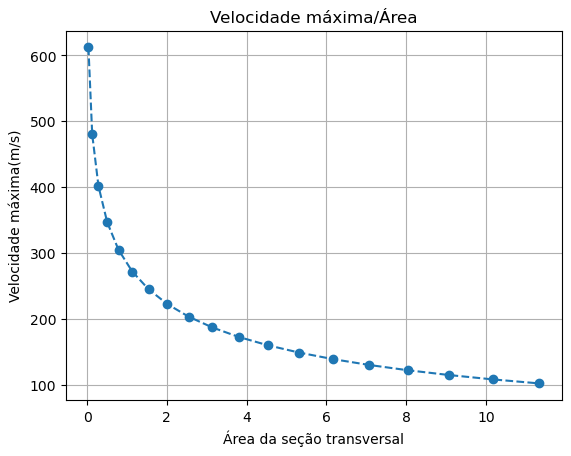

In [281]:
def areas(raio):
    Area = pi* (raio ** 2)
    return Area

lista_raio = np.arange(0.1, 2, 0.1)

lista_areas = [areas(raio) for raio in lista_raio]


def modelo2(X, t, vventox, vventoy, area):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
  
    v = ((vx ** 2) + (vy ** 2)) ** 0.5
    rho = densidade(y)
    
    vrel = sqrt((vventox-vx)**2+(vventoy-vy)**2)
    
    
    if t > 260:
        Fd = (1/2) * rho * 2*Atp * Cd * (vrel ** 2)
        vventoy = 0
    else:
        Fd = (1/2) * rho * area * Cd * (vrel ** 2)

    cosT = (vventox-vx)/vrel
    senT = (vventoy-vy)/vrel
    
    P = (G * Mt * m ) * ((1/(Rt + y)) ** 2)
       
    dxdt = vx
    dydt = vy
    dvxdt = (Fd * cosT) / m
    dvydt = ((Fd * senT) - P ) / m
    
    dXdt = [dxdt, dydt, dvxdt, dvydt]
    
    return dXdt

lista_vmax = list()

for area in lista_areas:
    g = odeint(modelo2, inicial, lista_t, args=(0,30,area))
    vx = g[:,2]
    vy = g[:,3]
    lista_v = np.sqrt(vx ** 2 + vy ** 2)
    vmax = max(lista_v)
    lista_vmax.append(vmax)
    
plt.plot(lista_areas, lista_vmax,'--o')
plt.grid()
plt.title('Velocidade máxima/Área')
plt.xlabel('Área da seção transversal')
plt.ylabel('Velocidade máxima(m/s)')
plt.show()
    
